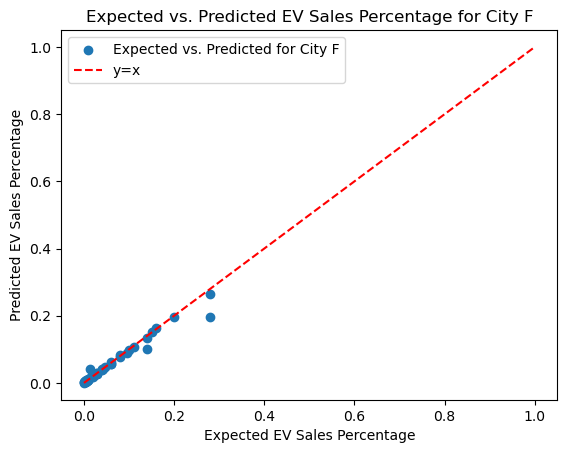

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data for cities A, B, C, and D
city_A_data = pd.read_csv('Amsterdam.csv')
city_B_data = pd.read_csv('Beijing.csv')
city_C_data = pd.read_csv('NewYork.csv')
city_D_data = pd.read_csv('Paris.csv')
city_E_data = pd.read_csv('Berlin.csv')
city_F_data = pd.read_csv('London.csv')

# Concatenate data from cities A, B, and C to create a combined dataset
combined_data = pd.concat([city_A_data, city_B_data, city_C_data, city_D_data, city_E_data], ignore_index=True)

# Define the features (independent variables) and the targets (dependent variables) for the combined dataset
X_combined = combined_data[['CPI', 'GNI per capita ', 'Average years of schooling',
       'Life expectancy (years)', 'CO2 level (t/capita)', 'PM2.5 pollution',
       'Per capita energy consumption (kWh)']]
y_combined = combined_data[['EVs sold as a percentage of entry-level cars',
       'EVs sold as a percentage of compact cars',
       'EVs sold as a percentage of mid-size cars',
       'EVs sold as a percentage of premium cars']]

# Split the combined data into training and testing sets
X_combined_train, X_combined_test, y_combined_train, y_combined_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model for non-linear regression
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the combined data
model.fit(X_combined_train, y_combined_train)

# Load the features for city F
X_F = city_F_data[['CPI', 'GNI per capita ', 'Average years of schooling',
       'Life expectancy (years)', 'CO2 level (t/capita)', 'PM2.5 pollution',
       'Per capita energy consumption (kWh)']]
# Predict EV sales percentages for city F
predicted_sales_percentages_F = model.predict(X_F)

# Create a scatter plot of expected vs. predicted values for city F
plt.scatter(y_combined_test, model.predict(X_combined_test), label='Expected vs. Predicted for City F')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='y=x')
plt.xlabel('Expected EV Sales Percentage')
plt.ylabel('Predicted EV Sales Percentage')
plt.title('Expected vs. Predicted EV Sales Percentage for City F')
plt.legend()
plt.show()


In [2]:
print(X_combined[0:40])

      CPI  GNI per capita   Average years of schooling  \
0   100.0            50000                        15.0   
1   101.0            51000                        15.5   
2   102.0            52000                        16.0   
3   103.0            53000                        16.5   
4   104.0            54000                        17.0   
5   105.0            55000                        17.5   
6   106.0            56000                        18.0   
7   107.0            57000                        18.5   
8   108.0            58000                        19.0   
9   109.0            59000                        19.5   
10  110.0            60000                        20.0   
11  111.0            61000                        20.5   
12  112.0            62000                        21.0   
13  100.0            10000                        12.0   
14  101.0            11000                        12.5   
15  102.0            12000                        13.0   
16  103.0     

In [3]:
print(predicted_sales_percentages_F)
Y_F=city_F_data[['EVs sold as a percentage of entry-level cars',
       'EVs sold as a percentage of compact cars',
       'EVs sold as a percentage of mid-size cars',
       'EVs sold as a percentage of premium cars']]
print(Y_F)

[[0.1055   0.057748 0.026866 0.048989]
 [0.080285 0.048327 0.033383 0.069302]
 [0.080372 0.048353 0.032725 0.066806]
 [0.082572 0.04928  0.032354 0.065156]
 [0.082606 0.049284 0.032236 0.064756]
 [0.088286 0.051962 0.032202 0.063177]
 [0.08828  0.051961 0.032231 0.063213]
 [0.088208 0.051945 0.032577 0.064415]
 [0.088171 0.051927 0.033419 0.06837 ]
 [0.088068 0.051893 0.033905 0.07049 ]
 [0.111251 0.06249  0.033272 0.06435 ]
 [0.111152 0.062446 0.033917 0.06725 ]]
    EVs sold as a percentage of entry-level cars  \
0                                          0.023   
1                                          0.031   
2                                          0.035   
3                                          0.039   
4                                          0.042   
5                                          0.047   
6                                          0.053   
7                                          0.056   
8                                          0.061   
9          

In [13]:
print(y_combined_test)
print(model.predict(X_combined_test))

    EVs sold as a percentage of entry-level cars  \
52                                        0.0090   
58                                        0.0029   
0                                         0.0100   
44                                        0.0600   
5                                         0.0600   
36                                        0.2000   
16                                        0.0400   
12                                        0.2800   
25                                        0.2800   
61                                        0.0021   
56                                        0.0048   
9                                         0.1600   
40                                        0.0200   

    EVs sold as a percentage of compact cars  \
52                                    0.0200   
58                                    0.0185   
0                                     0.0050   
44                                    0.0300   
5                              

In [14]:
print(type(y_combined_test))
print(type(model.predict(X_combined_test)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [15]:
import numpy as np
data_0=y_combined_test['EVs sold as a percentage of entry-level cars'].to_numpy()
data_1=y_combined_test['EVs sold as a percentage of compact cars'].to_numpy()
data_2=y_combined_test['EVs sold as a percentage of mid-size cars'].to_numpy()
data_3=y_combined_test['EVs sold as a percentage of premium cars'].to_numpy()
print(data_0)

[0.009  0.0029 0.01   0.06   0.06   0.2    0.04   0.28   0.28   0.0021
 0.0048 0.16   0.02  ]


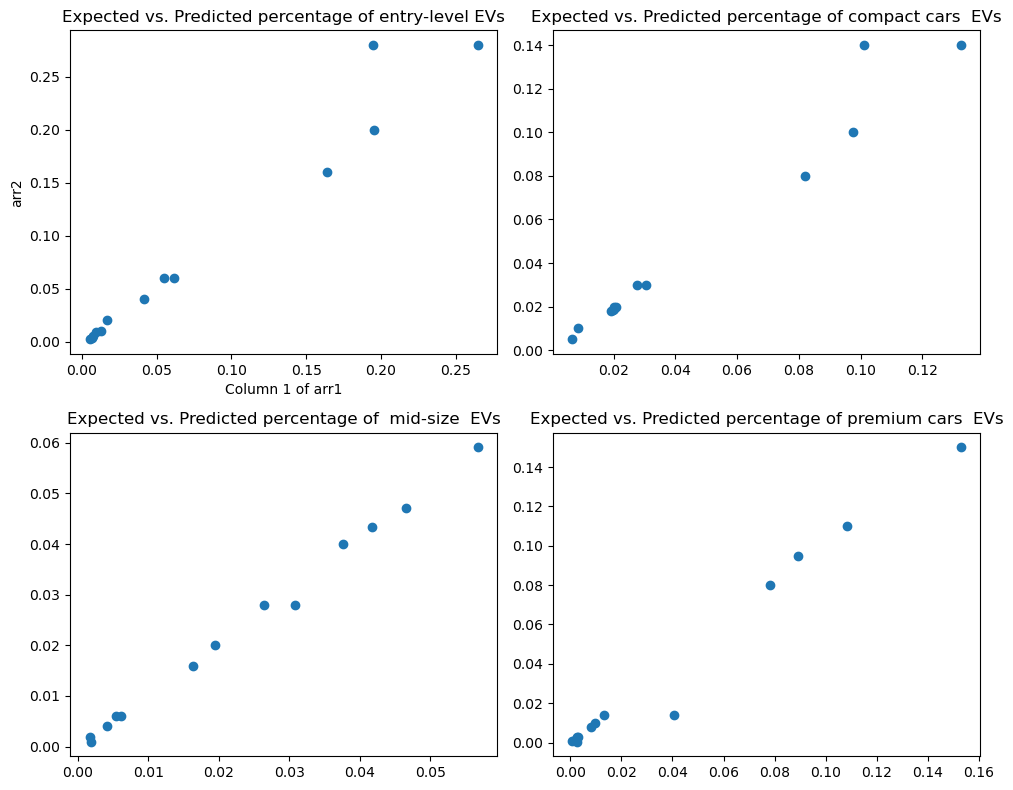

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the data in the following arrays
arr1 =  model.predict(X_combined_test)# Replace this with your actual data
arr2 = data_0
arr3 = data_1
arr4 = data_2
arr5 = data_3

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot 1st column of arr1 with arr2
axs[0, 0].scatter(arr1[:, 0], arr2, marker='o')
axs[0, 0].set_title('Expected vs. Predicted percentage of entry-level EVs')
axs[0, 0].set_xlabel('Column 1 of arr1')
axs[0, 0].set_ylabel('arr2')
# Plot 2nd column of arr1 with arr3
axs[0, 1].scatter(arr1[:, 1], arr3, marker='o')
axs[0, 1].set_title('Expected vs. Predicted percentage of compact cars  EVs')

# Plot 3rd column of arr1 with arr4
axs[1, 0].scatter(arr1[:, 2], arr4, marker='o')
axs[1, 0].set_title('Expected vs. Predicted percentage of  mid-size  EVs')

# Plot 4th column of arr1 with arr5
axs[1, 1].scatter(arr1[:, 3], arr5, marker='o')
axs[1, 1].set_title('Expected vs. Predicted percentage of premium cars  EVs')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


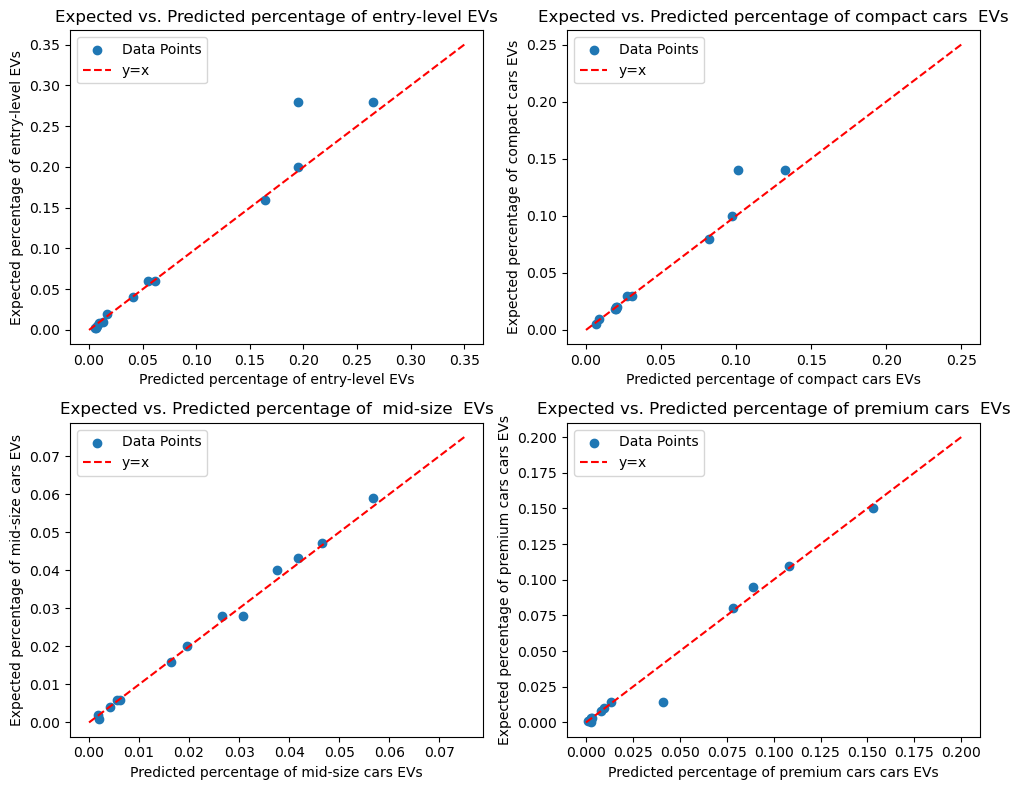

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the data in the following arrays

# Assuming you have the data in the following arrays
arr1 =  model.predict(X_combined_test)# Replace this with your actual data
arr2 = data_0
arr3 = data_1
arr4 = data_2
arr5 = data_3

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Scatter plot for the 1st column of arr1 with arr2
axs[0, 0].scatter(arr1[:, 0], arr2, marker='o', label='Data Points')
axs[0, 0].plot([0,0.35],[0,0.35],color='red', linestyle='--', label='y=x')
axs[0, 0].set_title('Expected vs. Predicted percentage of entry-level EVs')
axs[0, 0].set_xlabel('Predicted percentage of entry-level EVs')
axs[0, 0].set_ylabel('Expected percentage of entry-level EVs')
axs[0, 0].legend()

# Scatter plot for the 2nd column of arr1 with arr3
axs[0, 1].scatter(arr1[:, 1], arr3, marker='o', label='Data Points')
axs[0, 1].plot([0,0.25],[0,0.25],color='red', linestyle='--', label='y=x')
axs[0, 1].set_title('Expected vs. Predicted percentage of compact cars  EVs')
axs[0,1].set_xlabel('Predicted percentage of compact cars EVs')
axs[0,1].set_ylabel('Expected percentage of compact cars EVs')
axs[0, 1].legend()

# Scatter plot for the 3rd column of arr1 with arr4
axs[1, 0].scatter(arr1[:, 2], arr4, marker='o', label='Data Points')
axs[1, 0].plot([0,0.075],[0,0.075],color='red', linestyle='--', label='y=x')
axs[1, 0].set_title('Expected vs. Predicted percentage of  mid-size  EVs')
axs[1, 0].set_xlabel('Predicted percentage of mid-size cars EVs')
axs[1, 0].set_ylabel('Expected percentage of mid-size cars EVs')
axs[1, 0].legend()

# Scatter plot for the 4th column of arr1 with arr5
axs[1, 1].scatter(arr1[:, 3], arr5, marker='o', label='Data Points')
axs[1, 1].plot([0,0.2],[0,0.2],color='red', linestyle='--', label='y=x')
axs[1, 1].set_title('Expected vs. Predicted percentage of premium cars  EVs')
axs[1, 1].set_xlabel('Predicted percentage of premium cars cars EVs')
axs[1, 1].set_ylabel('Expected percentage of premium cars cars EVs')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show the scatter plots
plt.show()


In [18]:
k=y_combined_test['EVs sold as a percentage of entry-level cars']


In [19]:
print(arr1[:, 0])
print(data_0)
print(y_combined_test['EVs sold as a percentage of entry-level cars'])

[0.009565 0.006517 0.013014 0.055    0.0613   0.1952   0.0414   0.2648
 0.194979 0.005222 0.007642 0.164    0.0171  ]
[0.009  0.0029 0.01   0.06   0.06   0.2    0.04   0.28   0.28   0.0021
 0.0048 0.16   0.02  ]
52    0.0090
58    0.0029
0     0.0100
44    0.0600
5     0.0600
36    0.2000
16    0.0400
12    0.2800
25    0.2800
61    0.0021
56    0.0048
9     0.1600
40    0.0200
Name: EVs sold as a percentage of entry-level cars, dtype: float64


NameError: name 'X' is not defined

In [23]:
city_G_data = pd.read_csv("Delhi.csv")
X_G = city_G_data[['CPI', 'GNI per capita ', 'Average years of schooling',
       'Life expectancy (years)', 'CO2 level (t/capita)', 'PM2.5 pollution',
       'Per capita energy consumption (kWh)']]
predicted_sales_percentages_G = model.predict(X_G)
print(predicted_sales_percentages_G)

In [24]:
print(predicted_sales_percentages_G)

[[0.066413 0.042176 0.032074 0.06516 ]
 [0.066413 0.042176 0.032074 0.06516 ]
 [0.066413 0.042176 0.032074 0.06516 ]
 [0.066413 0.042176 0.032074 0.06516 ]
 [0.066413 0.042176 0.032074 0.06516 ]
 [0.066413 0.042176 0.032074 0.06516 ]
 [0.066413 0.042176 0.032074 0.06516 ]
 [0.066413 0.042176 0.032074 0.06516 ]
 [0.066413 0.042176 0.032074 0.06516 ]
 [0.066413 0.042176 0.032074 0.06516 ]]


C:\Users\rituv\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Forecasted Values:
2024-01-11    8508.287621
2024-01-12    9075.472634
Freq: D, Name: predicted_mean, dtype: float64


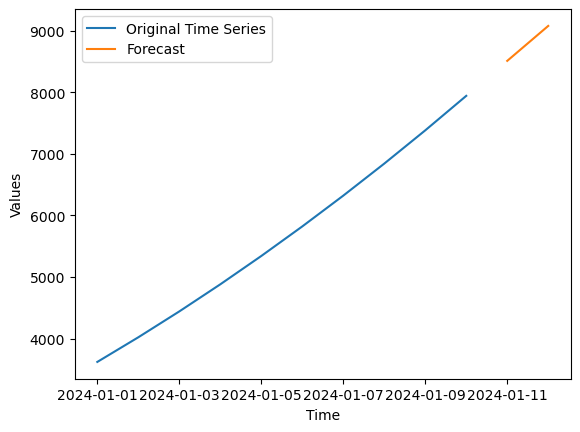

In [28]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Sample time series data (replace this with your own data)
data = np.array([10.2,10.4,10.6,10.8,11,])

# Create a Pandas DataFrame with a datetime index (assuming one data point per unit time)
date_index = pd.date_range(start='2024-01-01', periods=len(data), freq='D')
time_series = pd.Series(data, index=date_index)

# Fit ARIMA model
model = ARIMA(time_series, order=(1, 1, 1))  # Adjust order as needed
fit_model = model.fit()

# Forecast the next 2 points
forecast_steps = 2
forecast = fit_model.forecast(steps=forecast_steps)

# Display the forecasted values
print("Forecasted Values:")
print(forecast)

# Plotting the original time series and the forecast
plt.plot(time_series.index, time_series, label='Original Time Series')
plt.plot(pd.date_range(start=time_series.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()


In [26]:
print(X_combined)

      CPI
0   100.0
1   101.0
2   102.0
3   103.0
4   104.0
..    ...
59  220.2
60  228.2
61  237.1
62  246.9
63  258.4

[64 rows x 1 columns]
